In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# Import the KMeans module so we can perform k-means clustering with sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D 

LOAD THE DATA

In [117]:
data = pd.read_csv('retailcustomers.csv', index_col='Customer')

In [118]:
data.describe()

,Purchases,Sales,Months
count,24550.000000,24550.000000,24550.000000
mean,1.648106,775.197606,5.353483
std,10.675504,5798.000986,19.715218
min,1.000000,0.000000,0.000000
25%,1.000000,298.000000,0.000000
50%,1.000000,446.000000,0.000000
75%,1.000000,711.000000,0.000000
max,897.000000,516320.720000,185.000000


In [119]:
data.head()

,Purchases,Sales,Months
Customer,,,
1,17,5838.6,168
3,1,39.0,128
12,1,205.8,0
1000003,3,1304.0,0
1000021,1,98.0,162


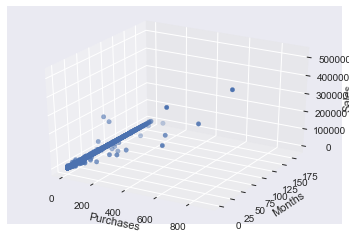

In [130]:
# plt.scatter(data['Purchases'],data['Sales'], data['Months'])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter( data['Purchases'], data['Months'], data['Sales'],cmap='rainbow')

ax.set_xlabel('Purchases')
ax.set_ylabel('Months')
ax.set_zlabel('Sales')

plt.show( )

SELECT THE FEATURES

In [106]:
x = data.iloc[:,0:3 ]

In [107]:
x.head()

,Purchases,Sales,Months
Customer,,,
1,17,5838.6,168
3,1,39.0,128
12,1,205.8,0
1000003,3,1304.0,0
1000021,1,98.0,162


CLUSTERING

In [108]:
kmeans = KMeans(3)

In [109]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

CLUSTERING RESULTS

In [110]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 0, ..., 0, 0, 0])

In [111]:
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters.head()

,Purchases,Sales,Months,Cluster
Customer,,,,
1,17,5838.6,168,0
3,1,39.0,128,0
12,1,205.8,0,0
1000003,3,1304.0,0,0
1000021,1,98.0,162,0


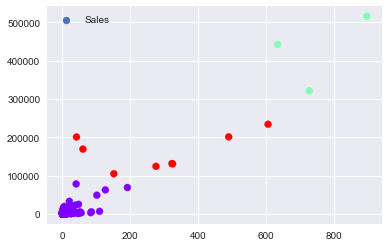

In [112]:
plt.scatter(data_with_clusters['Purchases'], data_with_clusters['Sales'], c=data_with_clusters['Cluster'], cmap='rainbow')
plt.legend(loc='upper left')
plt.show()

In [132]:
# create code with 3d scatter plot with all attributes here 

SELECTING THE NUMBER OF CLUSTERS

WCSS

In [72]:
kmeans.inertia_

44865417003.6356

In [73]:
wcss = []

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)


In [74]:
wcss

[825261999880.097,
 206488386746.55856,
 71993689203.51581,
 44886072688.49086,
 33344310469.565586,
 22313530939.349945,
 16106457090.524591,
 11310420371.051105,
 8613885501.575325]

THE ELBOW METHOD

Text(0,0.5,'Within-cluster Sum of Squares')

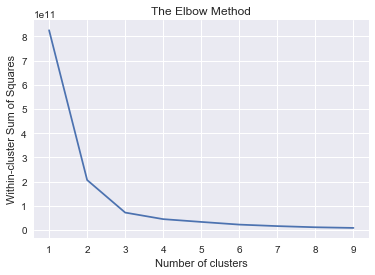

In [65]:
number_clusters = range(1,10)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

In [133]:
data_with_clusters.to_csv('Retail Data With Clusters.csv')